In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
matic = pd.read_csv ('./matic.csv')

In [3]:
matic['time'] = matic['time'].str.extract('(\d{4}-\d{2}-\d{2}\w\d{2}:\d{2}:\d{2})', expand=True)
matic['time'] = pd.to_datetime(matic["time"])
matic.set_index("time", inplace = True)

In [4]:
def Buy_RSI(matic):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(len(matic)):
    if (matic ['RSI'][i] < 19):
      if flag != 1:
        sigPriceBuy.append(matic['close'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif (matic["RSI"][i] > 74):
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(matic["close"][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  return(sigPriceBuy, sigPriceSell)

In [5]:
Buy_RSI = Buy_RSI(matic)
matic['Long Signal RSI'] = Buy_RSI[0]
matic['Close Long Signal RSI'] = Buy_RSI[1]
# To show the data
matic.head()

,close,VWAP,Volume,Volume MA,K,D,RSI,Long Signal RSI,Close Long Signal RSI
time,,,,,,,,,
2022-11-07 01:00:00,1.1381,1.135400,2418568,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-07 01:05:00,1.1517,1.140260,1693637,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-07 01:10:00,1.1573,1.143936,1649638,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-07 01:15:00,1.1698,1.151717,2972431,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-07 01:20:00,1.1739,1.154610,1453172,NaN,NaN,NaN,NaN,NaN,NaN


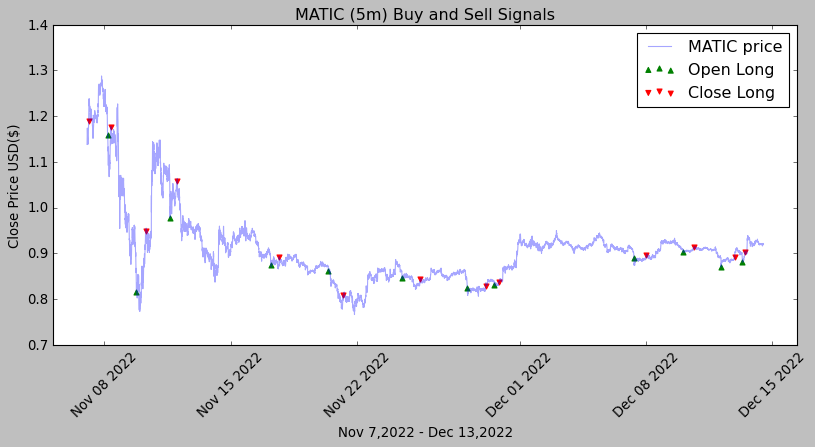

In [6]:
plt.style.use('classic')
plt.figure(figsize=(12,5))
plt.plot(matic['close'], label='MATIC price', alpha=0.35)
plt.plot(matic['Long Signal RSI'], label='', alpha=0.35)
plt.plot(matic['Close Long Signal RSI'],label='', alpha=0.35)
plt.scatter(matic.index, matic['Long Signal RSI'], label ='Open Long', marker='^',color='green')
plt.scatter(matic.index, matic['Close Long Signal RSI'], label='Close Long', marker='v', color='red')
plt.title('MATIC (5m) Buy and Sell Signals')
plt.xlabel("Nov 7,2022 - Dec 13,2022")
plt.xticks(rotation = '45')
plt.ylabel("Close Price USD($)")
plt.legend(loc='upper right')
plt.show()

In [7]:
df = matic.loc[(matic["Long Signal RSI"].notnull()) | (matic["Close Long Signal RSI"].notnull())]
#df = df.drop(df.index[0]).drop(df.index[-1])
df = df.drop(df.index[0])
df.head()

,close,VWAP,Volume,Volume MA,K,D,RSI,Long Signal RSI,Close Long Signal RSI
time,,,,,,,,,
2022-11-08 04:15:00,1.1582,1.210111,3683274,1793614.30,5.000000e-16,1.850000e-14,18.758854,1.1582,NaN
2022-11-08 08:45:00,1.1771,1.145119,3859093,2348944.85,1.000000e+02,9.152837e+01,74.729021,NaN,1.1771
2022-11-09 18:30:00,0.8155,0.935741,8002101,3826493.30,3.149665e+00,1.294370e+01,18.530387,0.8155,NaN
2022-11-10 06:45:00,0.9490,0.872483,2001302,1954825.15,9.669899e+01,9.549465e+01,75.811902,NaN,0.9490
2022-11-11 15:20:00,0.9780,1.069325,10539800,2092151.90,-8.880000e-16,6.492930e-01,15.904558,0.9780,NaN


In [8]:
open_list = list(df["Long Signal RSI"])
close_list = list(df["Close Long Signal RSI"])
open = [x for x in open_list if np.isnan(x) == False]
close = [x for x in close_list if np.isnan(x) == False]

In [9]:
positions = {'Open': open, 'Close': close}
positions = pd.DataFrame(positions)
positions

,Open,Close
0,1.1582,1.1771
1,0.8155,0.9490
2,0.9780,1.0579
3,0.8743,0.8929
4,0.8608,0.8080
5,0.8451,0.8438
6,0.8243,0.8290
7,0.8299,0.8378
8,0.8905,0.8958
9,0.9022,0.9128


In [10]:
def percentage_change(col1,col2):
    return ((col2 - col1) / col1) * 100

In [11]:
positions['Gained or Lost %'] = percentage_change(positions['Open'],positions['Close'])  
positions['Money made when risk is 100$'] = positions['Gained or Lost %'] * 50

In [12]:
positions["Money made when stop loss at 2%"] = np.where(positions["Money made when risk is 100$"] < -100, -100, positions["Money made when risk is 100$"])
positions.loc["Row_Total"] = positions.sum()

In [13]:
positions

,Open,Close,Gained or Lost %,Money made when risk is 100$,Money made when stop loss at 2%
0,1.1582,1.1771,1.631843,81.592126,81.592126
1,0.8155,0.9490,16.370325,818.516248,818.516248
2,0.9780,1.0579,8.169734,408.486708,408.486708
3,0.8743,0.8929,2.127416,106.370811,106.370811
4,0.8608,0.8080,-6.133829,-306.691450,-100.000000
5,0.8451,0.8438,-0.153828,-7.691397,-7.691397
6,0.8243,0.8290,0.570181,28.509038,28.509038
7,0.8299,0.8378,0.951922,47.596096,47.596096
8,0.8905,0.8958,0.595171,29.758563,29.758563
9,0.9022,0.9128,1.174906,58.745289,58.745289


In [14]:
(positions["Money made when stop loss at 2%"] > 0).value_counts()

True     11
False     2
Name: Money made when stop loss at 2%, dtype: int64